# **Data Preprocessing...**

In [31]:
# main library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# Opening JSON file
f = open('/content/drive/MyDrive/CGAS/archive/train.json',)
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Closing file
f.close()

In [3]:
# main recipe dataframe imported as json file from Kaggle 
df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


For ingredient information

In [4]:
#creating dataFrame for all the ingredients used in the recipe data
ingredients_data = pd.DataFrame(df['ingredients'].tolist())
ingredients_data = ingredients_data.fillna(value=np.nan)
ingredients_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,water,vegetable oil,wheat,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,black pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,light brown sugar,granulated sugar,butter,warm water,large eggs,all-purpose flour,whole wheat flour,cooking spray,boiling water,steel-cut oats,dry yeast,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39770,KRAFT Zesty Italian Dressing,purple onion,broccoli florets,rotini,pitted black olives,Kraft Grated Parmesan Cheese,red pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39771,eggs,citrus fruit,raisins,sourdough starter,flour,hot tea,sugar,ground nutmeg,salt,ground cinnamon,milk,butter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39772,boneless chicken skinless thigh,minced garlic,steamed white rice,baking powder,corn starch,dark soy sauce,kosher salt,peanuts,flour,scallions,Chinese rice vinegar,vodka,fresh ginger,egg whites,broccoli,toasted sesame seeds,sugar,store bought low sodium chicken stock,baking soda,Shaoxing wine,oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from collections import Counter

In [26]:
# getting unique ingredients from the recipe data and the count of the unique ingredients of recipe data
ing_list = []
for ing in Counter(np.array(ingredients_data.values).reshape(-1)).keys():
  ing_list.append(ing)
ing_list.remove(np.nan)
ingredients = np.array(ing_list)
ing_num = len(ingredients)

print(ingredients)
print(ing_num)

['romaine lettuce' 'black olives' 'grape tomatoes' ... 'lop chong'
 'tomato garlic pasta sauce' 'crushed cheese crackers']
6714


For recipe size and recipe size distribution

In [8]:
# getting the recipe sizes (ingredient count) of each of 39774 recipes
recipe_sizes = []
#count = 0
for rec in df['ingredients']:
  #count += 1
  recipe_sizes.append(len(rec))
print(recipe_sizes)
print(len(recipe_sizes))
#print(count)

[9, 11, 12, 4, 20, 12, 13, 10, 13, 6, 13, 15, 10, 17, 12, 10, 4, 4, 4, 13, 12, 6, 6, 12, 9, 15, 10, 11, 14, 4, 5, 16, 9, 17, 8, 9, 8, 10, 8, 14, 8, 5, 12, 10, 11, 8, 6, 8, 7, 6, 12, 10, 14, 10, 4, 22, 9, 6, 4, 8, 6, 12, 14, 20, 9, 8, 14, 5, 9, 7, 7, 22, 8, 8, 11, 16, 17, 3, 6, 6, 17, 9, 10, 17, 5, 8, 10, 8, 2, 8, 4, 9, 6, 6, 7, 17, 11, 15, 6, 7, 9, 8, 7, 6, 12, 10, 3, 16, 17, 10, 16, 11, 7, 13, 17, 9, 14, 10, 8, 9, 14, 15, 20, 8, 7, 10, 11, 6, 8, 12, 12, 12, 4, 6, 7, 10, 9, 5, 11, 10, 5, 14, 18, 2, 8, 7, 14, 11, 10, 4, 14, 11, 13, 13, 17, 6, 7, 13, 10, 9, 9, 7, 7, 13, 16, 13, 15, 14, 12, 13, 11, 5, 9, 15, 14, 9, 9, 12, 15, 16, 17, 7, 10, 15, 16, 6, 12, 10, 7, 6, 5, 8, 15, 6, 8, 11, 5, 10, 14, 17, 11, 5, 12, 11, 15, 5, 13, 6, 10, 9, 17, 20, 12, 5, 15, 4, 14, 15, 13, 9, 9, 4, 7, 8, 8, 11, 13, 8, 11, 14, 7, 5, 12, 8, 8, 9, 10, 16, 4, 14, 7, 13, 12, 16, 12, 20, 15, 7, 6, 13, 6, 24, 5, 7, 18, 9, 6, 5, 20, 9, 15, 6, 8, 15, 7, 10, 12, 6, 4, 11, 17, 6, 14, 7, 11, 12, 9, 4, 9, 12, 10, 11, 17, 9

For Ingredient Frequency i.e. count of each ingredient usage in the recipe data

In [9]:
# storing the ingredient and their count in recipe data as dictionary keys and corresponding values respectively
ing_dict = Counter(np.array(ingredients_data.values).reshape(-1))
del ing_dict[np.nan]
print(ing_dict)

Counter({'salt': 18049, 'onions': 7972, 'olive oil': 7972, 'water': 7457, 'garlic': 7380, 'sugar': 6434, 'garlic cloves': 6237, 'butter': 4848, 'ground black pepper': 4785, 'all-purpose flour': 4632, 'pepper': 4438, 'vegetable oil': 4385, 'eggs': 3388, 'soy sauce': 3296, 'kosher salt': 3113, 'green onions': 3078, 'tomatoes': 3058, 'large eggs': 2948, 'carrots': 2814, 'unsalted butter': 2782, 'ground cumin': 2747, 'extra-virgin olive oil': 2747, 'black pepper': 2627, 'milk': 2263, 'chili powder': 2036, 'oil': 1970, 'red bell pepper': 1939, 'purple onion': 1896, 'scallions': 1891, 'grated parmesan cheese': 1886, 'sesame oil': 1773, 'corn starch': 1757, 'ginger': 1755, 'baking powder': 1738, 'jalapeno chilies': 1730, 'dried oregano': 1707, 'chopped cilantro fresh': 1698, 'fresh lemon juice': 1679, 'diced tomatoes': 1624, 'fresh parsley': 1604, 'minced garlic': 1583, 'chicken broth': 1554, 'sour cream': 1539, 'cayenne pepper': 1523, 'fresh ginger': 1503, 'brown sugar': 1503, 'cooking spray

In [10]:
# getting the array of ingredient counts from the dictionary created above
ing_freq = []
for ingg in ingredients:
  ing_freq.append(ing_dict[ingg])
print(ing_freq)
print(len(ing_freq))

[270, 229, 228, 7380, 4438, 1896, 137, 148, 358, 154, 385, 18049, 3058, 4785, 361, 3388, 108, 341, 2263, 4385, 781, 483, 768, 5, 1442, 1184, 3296, 4848, 65, 7457, 26, 2627, 1477, 103, 1523, 7972, 282, 1395, 2036, 24, 1970, 2747, 343, 925, 40, 18, 839, 6434, 338, 1231, 1298, 678, 501, 1738, 7972, 461, 796, 1730, 1094, 73, 554, 940, 103, 22, 1, 1348, 173, 51, 56, 300, 119, 965, 424, 164, 1439, 1698, 298, 1137, 2747, 3113, 134, 62, 1707, 154, 55, 165, 1223, 578, 185, 425, 1503, 152, 341, 439, 1773, 1891, 264, 168, 505, 1757, 125, 114, 171, 1679, 13, 6237, 150, 285, 841, 768, 858, 1229, 1072, 258, 286, 4632, 473, 227, 99, 212, 41, 134, 1490, 738, 192, 37, 110, 644, 366, 455, 233, 5, 395, 81, 395, 8, 17, 19, 158, 1939, 1554, 116, 130, 472, 22, 1368, 387, 793, 71, 156, 429, 111, 317, 178, 509, 263, 454, 227, 20, 207, 22, 676, 459, 51, 137, 220, 93, 14, 122, 229, 248, 541, 155, 249, 28, 347, 9, 206, 455, 312, 406, 416, 87, 148, 1287, 268, 90, 340, 244, 79, 1886, 1146, 342, 296, 1180, 57, 13, 

# **Random Control - R0**

Function for generating random control r0 to preserve: \newline
* the number of ingredients (i.e. 6714) \newline
* the number of recipes (i.e. 39774) \newline
* the recipe size distribution of the data \newline



In [27]:
# shuffling the ingredients array for proper randomization
from sklearn.utils import shuffle
random_ingredients = shuffle(ingredients, random_state=0)
print(random_ingredients)

['italian eggplant' 'chilli paste' 'tomato juice' ... 'firm silken tofu'
 'lima beans' 'grapes']


In [28]:
# creating R0 Random Control Function
def generating_random_recipes_r0(ingredients,recipe_sizes,ing_num):
  random_ingredients_data = []   # to store the new recipes list generated from randomising the ingredients from the ingredient basket (ingredient array meta data)
  ing_index = 0
  for ing_size in recipe_sizes:
    new_recipe = []             # to store the randomly selected ingredients from the ingredient array meta data based on recipe sizes of each of 39774 recipes
    for num in range(ing_size):
      index = (ing_index + num) % ing_num
      #print(index)
      new_recipe.append(ingredients[index])
    random_ingredients_data.append(new_recipe)
    ing_index += ing_size
  new_recipe_data1 = pd.DataFrame()
  new_recipe_data1['ingredients'] = random_ingredients_data
  return new_recipe_data1

In [29]:
random_data1 = generating_random_recipes_r0(random_ingredients,recipe_sizes,ing_num)
random_data1

,ingredients
0,"[italian eggplant, chilli paste, tomato juice,..."
1,"[cauliflower, shichimi togarashi, creamer pota..."
2,"[navel oranges, flatbread, hamachi fillets, de..."
3,"[breasts halves, minced peperoncini, frozen se..."
4,"[persian cucumber, burgundy snails, cashew but..."
...,...
39769,"[forest mushroom, rutabaga, sugar syrup, blanc..."
39770,"[nonfat milk powder, shredded low-fat jarlsber..."
39771,"[cajun style stewed tomatoes, pasta wagon whee..."
39772,"[crumb crust, reduced fat milk, sweet turkey s..."


The number of recipes has been preserved.<br>
Checking for the number of ingredients and the recipe size distribution.

In [30]:
# checking whether the number of ingredients was maintained
random_ingredient_data1 = pd.DataFrame(random_data1['ingredients'].tolist())
random_ingredient_data1 = random_ingredient_data1.fillna(value=np.nan)

ing_list2 = []
for ing2 in Counter(np.array(random_ingredient_data1.values).reshape(-1)).keys():
  ing_list2.append(ing2)
ing_list2.remove(np.nan)
ingredients2 = np.array(ing_list2)
ing_num2 = len(ingredients2)

print(ingredients2)
print(ing_num2)

# checking whether the recipe size distribution array was maintained
recipe_sizes_rand1 = []
#count = 0
for rec2 in random_data1['ingredients']:
  #count += 1
  recipe_sizes_rand1.append(len(rec2))
print(recipe_sizes_rand1)
print(recipe_sizes)
#print(len(recipe_sizes_rand1))
#print(count)

['italian eggplant' 'chilli paste' 'tomato juice' ... 'firm silken tofu'
 'lima beans' 'grapes']
6714
[9, 11, 12, 4, 20, 12, 13, 10, 13, 6, 13, 15, 10, 17, 12, 10, 4, 4, 4, 13, 12, 6, 6, 12, 9, 15, 10, 11, 14, 4, 5, 16, 9, 17, 8, 9, 8, 10, 8, 14, 8, 5, 12, 10, 11, 8, 6, 8, 7, 6, 12, 10, 14, 10, 4, 22, 9, 6, 4, 8, 6, 12, 14, 20, 9, 8, 14, 5, 9, 7, 7, 22, 8, 8, 11, 16, 17, 3, 6, 6, 17, 9, 10, 17, 5, 8, 10, 8, 2, 8, 4, 9, 6, 6, 7, 17, 11, 15, 6, 7, 9, 8, 7, 6, 12, 10, 3, 16, 17, 10, 16, 11, 7, 13, 17, 9, 14, 10, 8, 9, 14, 15, 20, 8, 7, 10, 11, 6, 8, 12, 12, 12, 4, 6, 7, 10, 9, 5, 11, 10, 5, 14, 18, 2, 8, 7, 14, 11, 10, 4, 14, 11, 13, 13, 17, 6, 7, 13, 10, 9, 9, 7, 7, 13, 16, 13, 15, 14, 12, 13, 11, 5, 9, 15, 14, 9, 9, 12, 15, 16, 17, 7, 10, 15, 16, 6, 12, 10, 7, 6, 5, 8, 15, 6, 8, 11, 5, 10, 14, 17, 11, 5, 12, 11, 15, 5, 13, 6, 10, 9, 17, 20, 12, 5, 15, 4, 14, 15, 13, 9, 9, 4, 7, 8, 8, 11, 13, 8, 11, 14, 7, 5, 12, 8, 8, 9, 10, 16, 4, 14, 7, 13, 12, 16, 12, 20, 15, 7, 6, 13, 6, 24, 5, 7, 1

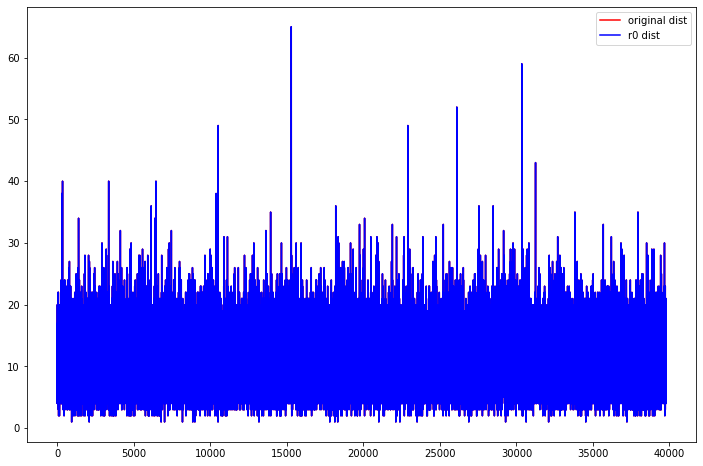

In [37]:
#Plotting the two distribution plots for comparison
plt.figure(figsize=(12,8))
#plotting original recipe size distribution
plt.plot(recipe_sizes, color='r', label = 'original dist')
#plotting random control - r0 recipe size distribution
plt.plot(recipe_sizes_rand1, color='b', label = 'r0 dist')
plt.legend()
plt.show()

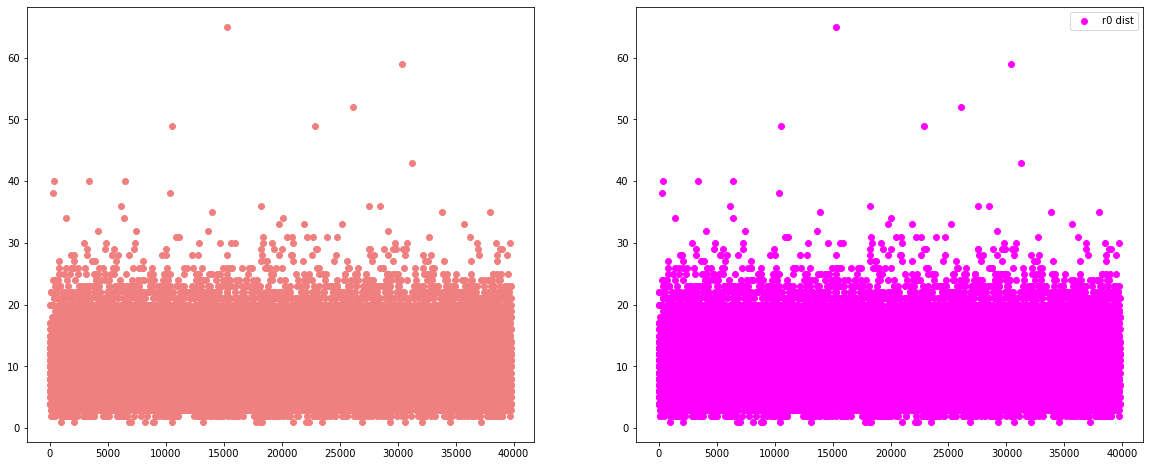

In [49]:
#scatter plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
axes[0].scatter(range(39774),recipe_sizes,color='lightcoral',label='original dist')
#plt.legend()
axes[1].scatter(range(39774),recipe_sizes_rand1,color='fuchsia',label='r0 dist')
plt.legend()
plt.show()

In the above figure, scatter plots for:<br>
Left: Original Recipe Size Distribution <br>
Right: Random control R0 generated Recipe Size Distribution <br>
for comparison.

In [176]:
# Generating another set of plots for comparison of recipe size distribution plot
# Creating normalized data dictionary of recipe sizes for plot
def RecDistributionCuisine(recipe_sizes):
  recipe_size_dict = {} #storing size of each recipe and total number of recipes having that size
  for ing in recipe_sizes:
    if ing not in recipe_size_dict:
      recipe_size_dict[ing]=1
    else:
      recipe_size_dict[ing]+=1
  print("\n Recipe Size Distributions: \n", recipe_size_dict)
  #print("df:",df.shape[0])
  for i in recipe_size_dict:
    recipe_size_dict[i] = (recipe_size_dict[i]/65)*100 #normalizing recipe sizes with total number of recipes and computing percentage
  print("\n Recipe Size Distribution in Percentage: \n", recipe_size_dict)
  return recipe_size_dict

In [151]:
# Generate plot from the dictionary created above
def generatePlot2(recipe_size):
  recipe_sort = dict(sorted(recipe_size.items(), key=lambda x: x[0])) #sorting recipe sizes
  X=[] #storing recipe_sizes
  Y=[] #number of recipes having that size
  for i in recipe_sort:
    X.append(i)
    Y.append(recipe_sort[i])
  plt.scatter(X, Y)
  plt.plot(X,Y)
  plt.title('Recipe-Size Distribution')
  plt.ylabel('Percentage')
  plt.xlabel('Recipe Size')
  plt.grid()

************Original Plot for recipe size distribution************
________________________________________________________________________

 Recipe Size Distributions: 
 {1: 22, 2: 193, 3: 549, 4: 1128, 5: 1891, 6: 2662, 7: 3329, 8: 3556, 9: 3753, 10: 3677, 11: 3512, 12: 3146, 13: 2698, 14: 2253, 15: 1809, 16: 1439, 17: 1160, 18: 879, 19: 610, 20: 504, 21: 313, 22: 218, 23: 141, 24: 91, 25: 72, 26: 46, 27: 20, 28: 27, 29: 21, 30: 15, 31: 11, 32: 4, 33: 4, 34: 3, 35: 3, 36: 4, 38: 2, 40: 3, 43: 1, 49: 2, 52: 1, 59: 1, 65: 1}

 Recipe Size Distribution in Percentage: 
 {1: 33.84615384615385, 2: 296.9230769230769, 3: 844.6153846153846, 4: 1735.3846153846152, 5: 2909.230769230769, 6: 4095.3846153846152, 7: 5121.538461538462, 8: 5470.7692307692305, 9: 5773.846153846153, 10: 5656.923076923077, 11: 5403.076923076923, 12: 4840.0, 13: 4150.7692307692305, 14: 3466.153846153846, 15: 2783.0769230769233, 16: 2213.846153846154, 17: 1784.6153846153848, 18: 1352.3076923076924, 19: 938.4615384615385, 

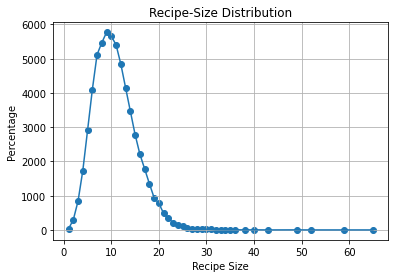

In [171]:
print("************Original Plot for recipe size distribution************")
print("________________________________________________________________________")
recipe_size_dist = RecDistributionCuisine(recipe_sizes)
generatePlot2(recipe_size_dist)


************Random Control R0 Plot for recipe size distribution************
________________________________________________________________________

 Recipe Size Distributions: 
 {9: 3753, 11: 3512, 12: 3146, 4: 1128, 20: 504, 13: 2698, 10: 3677, 6: 2662, 15: 1809, 17: 1160, 14: 2253, 5: 1891, 16: 1439, 8: 3556, 7: 3329, 22: 218, 3: 549, 2: 193, 18: 879, 24: 91, 38: 2, 21: 313, 40: 3, 23: 141, 19: 610, 25: 72, 26: 46, 27: 20, 1: 22, 34: 3, 28: 27, 30: 15, 29: 21, 32: 4, 36: 4, 49: 2, 31: 11, 35: 3, 65: 1, 33: 4, 52: 1, 59: 1, 43: 1}

 Recipe Size Distribution in Percentage: 
 {9: 5773.846153846153, 11: 5403.076923076923, 12: 4840.0, 4: 1735.3846153846152, 20: 775.3846153846154, 13: 4150.7692307692305, 10: 5656.923076923077, 6: 4095.3846153846152, 15: 2783.0769230769233, 17: 1784.6153846153848, 14: 3466.153846153846, 5: 2909.230769230769, 16: 2213.846153846154, 8: 5470.7692307692305, 7: 5121.538461538462, 22: 335.3846153846154, 3: 844.6153846153846, 2: 296.9230769230769, 18: 1352.30769

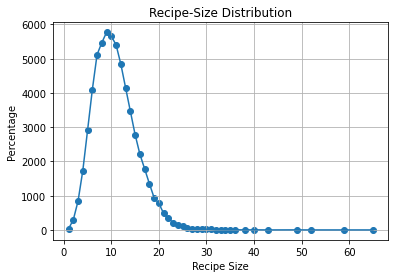

In [172]:
print("************Random Control R0 Plot for recipe size distribution************")
print("________________________________________________________________________")
recipe_size_dist2 = RecDistributionCuisine(recipe_sizes_rand1)
generatePlot2(recipe_size_dist2)

# **Random Control - R1**

Function for generating random control R1 to preserve: \newline
* the number of ingredients (i.e. 6714) \newline
* the number of recipes (i.e. 39774) \newline
* the recipe size distribution of the data \newline
* the count of ingredients in the recipe data - ingredient frequency


In [53]:
print(ing_dict)

Counter({'salt': 18049, 'onions': 7972, 'olive oil': 7972, 'water': 7457, 'garlic': 7380, 'sugar': 6434, 'garlic cloves': 6237, 'butter': 4848, 'ground black pepper': 4785, 'all-purpose flour': 4632, 'pepper': 4438, 'vegetable oil': 4385, 'eggs': 3388, 'soy sauce': 3296, 'kosher salt': 3113, 'green onions': 3078, 'tomatoes': 3058, 'large eggs': 2948, 'carrots': 2814, 'unsalted butter': 2782, 'ground cumin': 2747, 'extra-virgin olive oil': 2747, 'black pepper': 2627, 'milk': 2263, 'chili powder': 2036, 'oil': 1970, 'red bell pepper': 1939, 'purple onion': 1896, 'scallions': 1891, 'grated parmesan cheese': 1886, 'sesame oil': 1773, 'corn starch': 1757, 'ginger': 1755, 'baking powder': 1738, 'jalapeno chilies': 1730, 'dried oregano': 1707, 'chopped cilantro fresh': 1698, 'fresh lemon juice': 1679, 'diced tomatoes': 1624, 'fresh parsley': 1604, 'minced garlic': 1583, 'chicken broth': 1554, 'sour cream': 1539, 'cayenne pepper': 1523, 'fresh ginger': 1503, 'brown sugar': 1503, 'cooking spray

In [52]:
ing_dict_copy = dict(ing_dict)
print(ing_dict_copy)
print(len(ing_dict_copy.keys()))

{'romaine lettuce': 270, 'black olives': 229, 'grape tomatoes': 228, 'garlic': 7380, 'pepper': 4438, 'purple onion': 1896, 'seasoning': 137, 'garbanzo beans': 148, 'feta cheese crumbles': 358, 'plain flour': 154, 'ground pepper': 385, 'salt': 18049, 'tomatoes': 3058, 'ground black pepper': 4785, 'thyme': 361, 'eggs': 3388, 'green tomatoes': 108, 'yellow corn meal': 341, 'milk': 2263, 'vegetable oil': 4385, 'mayonaise': 781, 'cooking oil': 483, 'green chilies': 768, 'grilled chicken breasts': 5, 'garlic powder': 1442, 'yellow onion': 1184, 'soy sauce': 3296, 'butter': 4848, 'chicken livers': 65, 'water': 7457, 'wheat': 26, 'black pepper': 2627, 'shallots': 1477, 'cornflour': 103, 'cayenne pepper': 1523, 'onions': 7972, 'garlic paste': 282, 'lemon juice': 1395, 'chili powder': 2036, 'passata': 24, 'oil': 1970, 'ground cumin': 2747, 'boneless chicken skinless thigh': 343, 'garam masala': 925, 'double cream': 40, 'natural yogurt': 18, 'bay leaf': 839, 'sugar': 6434, 'fresh ginger root': 33

In [108]:
import sys

In [109]:
# extending the recursion limit to 10^6 instead of normal limit of 1000 to retrieve for 6K ingredients using recursive function
sys.setrecursionlimit(10**6)

In [114]:
# function to retrieve ingredients as per their original count in the kaggle recipe data
# this is done to preserve the ingredient frequency while creating new randomized data using random control R1
def get_ingredients(index,ing_dict,ingredients,ing_num):
  ingredient = ''
  index = index % ing_num
  if ingredients[index] in ing_dict.keys():
    # if(ing_dict[ingredients[index]] == 0):
    #   del ing_dict[ingredients[index]]
    #   ingredient = get_ingredients(index+1,ing_dict,ingredients,ing_num)
    # else:
    #   ingredient = ingredients[index]
    #   ing_dict[ingredients[index]] -= 1
    ingredient = ingredients[index]
    ing_dict[ingredients[index]] -= 1
    if ing_dict[ingredients[index]] == 0:
      #del ing_dict[ingredients[index]]
      np.delete(ingredients,index)
  else:
    ingredient = get_ingredients(index+1,ing_dict,ingredients,ing_num)
  return ingredient

In [115]:
# Random Control R1 function to preserve no. of ingredients, no. of recipes, recipe size dist and ingredient frequency
def generating_random_recipes_r1(ingredients,recipe_sizes,ing_num,ing_dict):
  random_ingredients_data2 = []
  ing_index = 0
  for ing_size in recipe_sizes:
    new_recipe2 = []
    temp_index = ing_index % ing_num
    for num in range(ing_size):
      index = (temp_index + num)%ing_num
      #print(index)
      new_recipe2.append(get_ingredients(index,ing_dict,ingredients,ing_num))
      # if(ing_dict[ingredients[index]]>0):
      #   new_recipe2.append(ingredients[index])
      #   ing_dict[ingredients[index]] -= 1
      # else:
      #   continue
    random_ingredients_data2.append(new_recipe2)
    ing_index += ing_size
  new_recipe_data2 = pd.DataFrame()
  new_recipe_data2['ingredients'] = random_ingredients_data2
  return new_recipe_data2

Copying the shuffled array of ingredients to randomize the recipe data creation for random control R1

In [138]:
# shuffling the ingredients once again to maintain randomness while generating recipes
random_ingredients2 = shuffle(random_ingredients, random_state=0)
print(random_ingredients2)
print(len(random_ingredients2))

['pierogi' 'Boursin' 'sugar pea' ... 'jerk marinade' 'collard leaves'
 'soybean sprouts']
6714


In [141]:
# generating the new randomised data based on random control R1
random_data2 = generating_random_recipes_r1(random_ingredients,recipe_sizes,ing_num,ing_dict_copy)
#random_data2

In [167]:
# checking whether the number of ingredients was maintained
random_ingredient_data2 = pd.DataFrame(random_data2['ingredients'].tolist())
random_ingredient_data2 = random_ingredient_data2.fillna(value=np.nan)

ing_list3 = []
for ing3 in Counter(np.array(random_ingredient_data2.values).reshape(-1)).keys():     
  ing_list3.append(ing3)
ing_list3.remove(np.nan)
ingredients3 = np.array(ing_list3)
ing_num3 = len(ingredients3)

# print(ingredients3)
# print(ing_num3)

print(random_ingredients2)
print(len(random_ingredients2))

# checking whether the recipe size distribution array was maintained
recipe_sizes_rand2 = []
#count = 0
for rec3 in random_data2['ingredients']:
  #count += 1
  recipe_sizes_rand2.append(len(rec3))
print(recipe_sizes_rand2)                   # sorted print
print(recipe_sizes)                         # sorted print
print(len(recipe_sizes_rand2))
#print(count)

['pierogi' 'Boursin' 'sugar pea' ... 'jerk marinade' 'collard leaves'
 'soybean sprouts']
6714
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

Comparing both the recipe size distributions of original data and the data generated using random control 1

In [123]:
# function to compare whether the two arrays are the same
# made to compare the arrays for recipe size distribution
def compare(first, second, size):
    first.sort()
    second.sort()

    for i in range(size):
        if first[i] != second[i]:
            return False

    return True

In [129]:
# comparing the recipe size distribution arrays for the original data and for the random control R1 generated data respectively
compare(recipe_sizes, recipe_sizes_rand2, 39774)

True

Comparing the Ingredient Frequencies of original data with the random control 1 data

In [132]:
# creating sorted ingredient frequency dictionaries for original data and the random control R1 generated data and comparing them together
import operator
sorted_ing_dict = sorted(ing_dict.items(), key=operator.itemgetter(1),reverse=True)

rand1_ing_dict = Counter(np.array(random_ingredient_data2.values).reshape(-1))
del rand1_ing_dict[np.nan]
sorted_rand1_ing_dict = sorted(rand1_ing_dict.items(), key=operator.itemgetter(1),reverse=True)

print("Sorted Ingredient Frequencies")
print(sorted_ing_dict)
print('\n')
print("Sorted Random Control 1 Ingredient Frequencies")
print(sorted_rand1_ing_dict)

Sorted Ingredient Frequencies
[('salt', 18049), ('onions', 7972), ('olive oil', 7972), ('water', 7457), ('garlic', 7380), ('sugar', 6434), ('garlic cloves', 6237), ('butter', 4848), ('ground black pepper', 4785), ('all-purpose flour', 4632), ('pepper', 4438), ('vegetable oil', 4385), ('eggs', 3388), ('soy sauce', 3296), ('kosher salt', 3113), ('green onions', 3078), ('tomatoes', 3058), ('large eggs', 2948), ('carrots', 2814), ('unsalted butter', 2782), ('ground cumin', 2747), ('extra-virgin olive oil', 2747), ('black pepper', 2627), ('milk', 2263), ('chili powder', 2036), ('oil', 1970), ('red bell pepper', 1939), ('purple onion', 1896), ('scallions', 1891), ('grated parmesan cheese', 1886), ('sesame oil', 1773), ('corn starch', 1757), ('ginger', 1755), ('baking powder', 1738), ('jalapeno chilies', 1730), ('dried oregano', 1707), ('chopped cilantro fresh', 1698), ('fresh lemon juice', 1679), ('diced tomatoes', 1624), ('fresh parsley', 1604), ('minced garlic', 1583), ('chicken broth', 15

Plotting the Ingredient Frequencies Plot

Ingredient Frequency Scatter Plot - sorted for Original Recipe Data

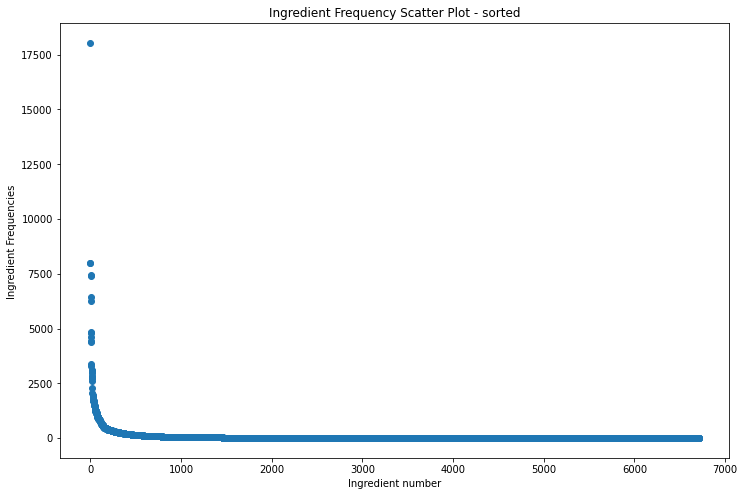

In [162]:
# plotting scatter plot for the original ingredient frequencies from the kaggle recipes data
plt.figure(figsize=(12,8))
plt.scatter(range(6714),dict(sorted_ing_dict).values())
plt.title("Ingredient Frequency Scatter Plot - sorted")
plt.ylabel("Ingredient Frequencies ")
plt.xlabel("Ingredient number") #since ingredient names would take up space and look messy while visualising
plt.show()

Ingredient Frequency Scatter Plot - sorted for Random Control R1 Recipe Data

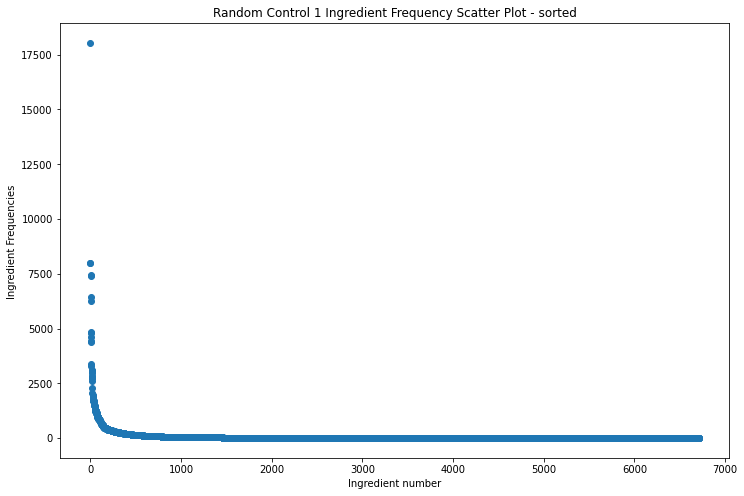

In [164]:
# plotting scatter plot for the ingredient frequencies from the random control R1 generated data
plt.figure(figsize=(12,8))
plt.scatter(range(6714),dict(sorted_rand1_ing_dict).values())
plt.title("Random Control 1 Ingredient Frequency Scatter Plot - sorted")
plt.ylabel("Ingredient Frequencies ")
plt.xlabel("Ingredient number") #since ingredient names would take up space and look messy while visualising
plt.show()

Recipe Size Distribution plots to show comparison after random control R1

************Original Plot for recipe size distribution************
________________________________________________________________________

 Recipe Size Distributions: 
 {1: 22, 2: 193, 3: 549, 4: 1128, 5: 1891, 6: 2662, 7: 3329, 8: 3556, 9: 3753, 10: 3677, 11: 3512, 12: 3146, 13: 2698, 14: 2253, 15: 1809, 16: 1439, 17: 1160, 18: 879, 19: 610, 20: 504, 21: 313, 22: 218, 23: 141, 24: 91, 25: 72, 26: 46, 27: 20, 28: 27, 29: 21, 30: 15, 31: 11, 32: 4, 33: 4, 34: 3, 35: 3, 36: 4, 38: 2, 40: 3, 43: 1, 49: 2, 52: 1, 59: 1, 65: 1}

 Recipe Size Distribution in Percentage: 
 {1: 33.84615384615385, 2: 296.9230769230769, 3: 844.6153846153846, 4: 1735.3846153846152, 5: 2909.230769230769, 6: 4095.3846153846152, 7: 5121.538461538462, 8: 5470.7692307692305, 9: 5773.846153846153, 10: 5656.923076923077, 11: 5403.076923076923, 12: 4840.0, 13: 4150.7692307692305, 14: 3466.153846153846, 15: 2783.0769230769233, 16: 2213.846153846154, 17: 1784.6153846153848, 18: 1352.3076923076924, 19: 938.4615384615385, 

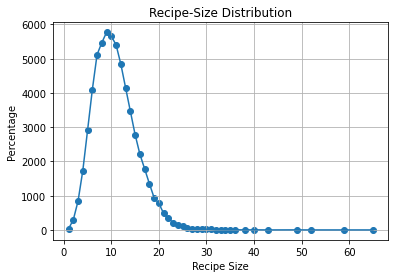

In [173]:
print("************Original Plot for recipe size distribution************")
print("________________________________________________________________________")
recipe_size_dist = RecDistributionCuisine(recipe_sizes)
generatePlot2(recipe_size_dist)


************Random Control R1 Plot for recipe size distribution************
________________________________________________________________________

 Recipe Size Distributions: 
 {1: 22, 2: 193, 3: 549, 4: 1128, 5: 1891, 6: 2662, 7: 3329, 8: 3556, 9: 3753, 10: 3677, 11: 3512, 12: 3146, 13: 2698, 14: 2253, 15: 1809, 16: 1439, 17: 1160, 18: 879, 19: 610, 20: 504, 21: 313, 22: 218, 23: 141, 24: 91, 25: 72, 26: 46, 27: 20, 28: 27, 29: 21, 30: 15, 31: 11, 32: 4, 33: 4, 34: 3, 35: 3, 36: 4, 38: 2, 40: 3, 43: 1, 49: 2, 52: 1, 59: 1, 65: 1}

 Recipe Size Distribution in Percentage: 
 {1: 33.84615384615385, 2: 296.9230769230769, 3: 844.6153846153846, 4: 1735.3846153846152, 5: 2909.230769230769, 6: 4095.3846153846152, 7: 5121.538461538462, 8: 5470.7692307692305, 9: 5773.846153846153, 10: 5656.923076923077, 11: 5403.076923076923, 12: 4840.0, 13: 4150.7692307692305, 14: 3466.153846153846, 15: 2783.0769230769233, 16: 2213.846153846154, 17: 1784.6153846153848, 18: 1352.3076923076924, 19: 938.461538

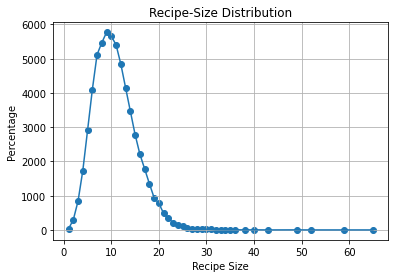

In [174]:
print("************Random Control R1 Plot for recipe size distribution************")
print("________________________________________________________________________")
recipe_size_dist3 = RecDistributionCuisine(recipe_sizes_rand2)
generatePlot2(recipe_size_dist3)

# **Generating PDF Report of this Jupyter Notebook File**

In [178]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CGAS_Assignment3_MT20075_RandomControls.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CGAS_Assignment3_MT20075_RandomControls.ipynb to pdf
[NbConvertApp] Support files will be in CGAS_Assignment3_MT20075_RandomControls_files/
[NbConvertApp] Making directory ./CGAS_Assignment3_MT20075_RandomControls_files
[NbConvertApp] Making directory ./CGAS_Assignment3_MT20075_RandomControls_files
[NbConvertApp] Making directory ./CGAS_Assignment3_MT20075_RandomControls_files
[NbConvertApp] Making directory ./CGAS_Assignment3_MT20075_RandomControls_files
[NbConvertApp] Making directory ./CGAS_Assignment3_MT20075_RandomControls_files
[NbConvertApp] Making directory ./CGAS_Assignment3_MT20075_RandomControls_files
[NbConvertApp] Making directory ./CGAS_Assignment3_MT20075_RandomControls_files
[NbConvertApp] Making directory ./CGAS_Assignment3_MT20075_RandomControls_files
[NbConvertApp] Writing 1606400 bytes to ./noteboo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'